# EDA

: 데이터 그 자체를 육안으로 확인하는 과정. **즉, 데이터 그 자체만으로부터 인사이트를 얻어내는 접근법**


# EDA Process

## 1. 분석의 목적과 변수 확인
## 2. 데이터 전체적으로 살펴보기
## 3. 데이터의 개별 속성 파악하기

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [33]:
titanic_df = pd.read_csv("./train.csv")

# 1. 분석의 목적과 변수 확인

 - 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [34]:
titanic_df.head(5) #NaN : 결측치

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
# 각 열의 데이터타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [36]:
# 데이터 전체 정보(개수, 평균 등등)를 얻는 함수: .describe()

titanic_df.describe() # 수치형 데이터에 대한 요약만을 제공

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
titanic_df.corr() # 상관계수 확인

# 상관성: 경향성을 나타내는 수치. A up, B up, ...
# 인과성: 종속관계를 나타냄. A -> B
# 상관성 != 인과성

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [38]:
titanic_df.isnull() # 결측치 확인. null 이면 True

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
titanic_df.isnull().sum() # 결측치 개수 확인.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
# Age, Cabin, Embarked 에서 결측치 발견

# 3. 데이터의 개별 속성 파악하기

## I. Survived Column

In [41]:
# 생존자와 사망자 수는?

titanic_df["Survived"].head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [42]:
titanic_df["Survived"].sum() # 생존자 수 (생존자가 1, 사망자가 0이므로)

342

In [43]:
titanic_df["Survived"].value_counts() # 각 데이터가 몇 번 등장했는지 확인 가능

0    549
1    342
Name: Survived, dtype: int64

In [44]:
# 사망자 549명

<AxesSubplot:xlabel='Survived', ylabel='count'>

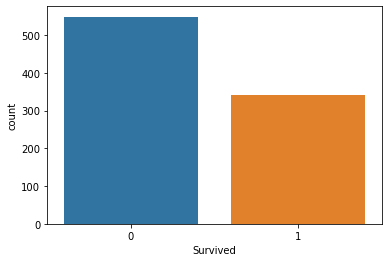

In [45]:
# 생존자수와 사망자수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x="Survived", data=titanic_df) # 각 카테고리 별로 count를 해서 그 결과를 시각화

## II. Pclass

In [46]:
# Pclass에 따른 인원 파악

titanic_df[["Pclass", "Survived"]].groupby(["Pclass"]).count() # Pclass 기준으로 그룹으로 묶고 count -> Pclass 인원 확인 가능!

,Survived
Pclass,
1,216
2,184
3,491


In [47]:
# 생존자 인원?

titanic_df[["Pclass", "Survived"]].groupby(["Pclass"]).sum() # Pclass 에 따른 생존자 확인 가능! (사망자는 0이므로 sum해도 숫자 안더해짐)

,Survived
Pclass,
1,136
2,87
3,119


In [48]:
titanic_df[["Pclass", "Survived"]].groupby(["Pclass"]).mean() # 생존 비율(생존자/전체)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

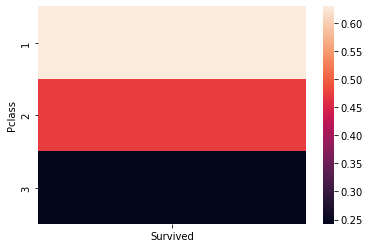

In [49]:
# 히트맵 활용
sns.heatmap(titanic_df[["Pclass", "Survived"]].groupby(["Pclass"]).mean())
plt.plot()

class가 높아질 수록, 생존률이 높음

 ## III. 성

In [50]:
titanic_df[["Sex", "Survived"]]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [51]:
# groupby 기준을 2개로!

titanic_df.groupby(["Survived", "Sex"])["Survived"].count() # 성별에 따른 생존자

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

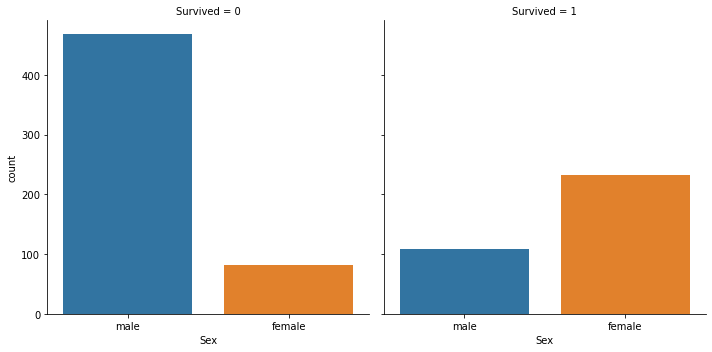

In [52]:
sns.catplot(x="Sex", col="Survived", kind="count", data=titanic_df) # countplot이용, 생존자 열 이용
plt.show()

남성이 여성보다 많이 사망한 편.

## IV. Age
**결측치 존재!**

In [53]:
titanic_df.describe()["Age"]

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

연속적인 데이터의 경향성을 스무스하게 확인할 수 있는 plot : **커널밀도그림**

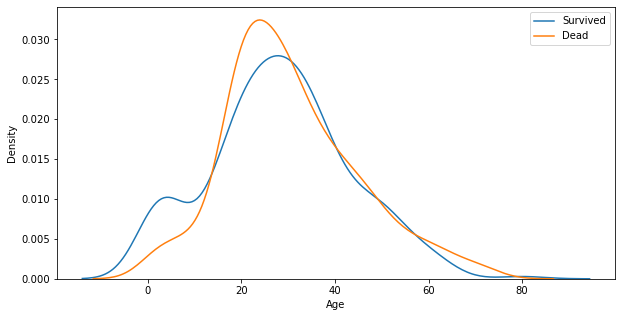

In [56]:
fig, ax = plt.subplots(1,1,figsize=(10,5)) # subplots: 여러개의 플롯을 한번에 보여줄 때 사용. subplots(가로엔 몇개의 그래프를 그릴것인지, 세로엔 몇개의 그래프를 그릴 것인지, 그래프 크기)
sns.kdeplot(x=titanic_df[titanic_df.Survived==1]["Age"], ax=ax) # 커널밀도함수. ax: 커널밀도 그림을 어떤 축에 그릴거냐를 정함. 여기서는 ax축에 다 그려주겠다 선언.
sns.kdeplot(x=titanic_df[titanic_df.Survived==0]["Age"], ax=ax)

plt.legend(["Survived", "Dead"]) # 범례 그려주기
plt.show()

## 어린아이가 많이 살아남음. 청년들이 많이 사망. 고령층도 사망하신 분이 생존하신 분보다 더 많음

### Appendix I. 성별 + Pclass vs Survived

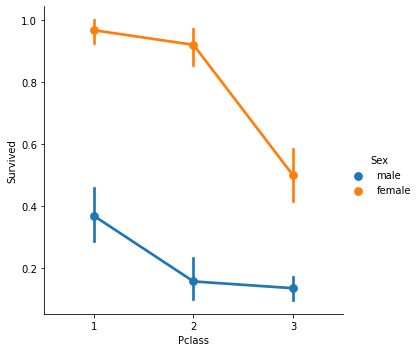

In [58]:
sns.catplot(x="Pclass", y="Survived", hue = "Sex", kind="point", data=titanic_df) # 포인트 그래프 그리기
plt.show()
# hue: 그래프를 다른 범주형 변수로 나눌 수 있는 키워드. 여기서는 성별로 그래프를 나눔

Pclass 1이면서 여성은 거의 살음
Pclass 3이면서 남성은 거의 사망

## Appendix II. Age+Pclass

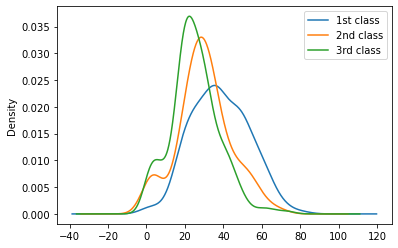

In [62]:
titanic_df["Age"][titanic_df.Pclass==1].plot(kind="kde") # KDE: 커널밀도추정
titanic_df["Age"][titanic_df.Pclass==2].plot(kind="kde") # KDE: 커널밀도추정
titanic_df["Age"][titanic_df.Pclass==3].plot(kind="kde") # KDE: 커널밀도추정

plt.legend(["1st class", "2nd class", "3rd class"])
plt.show()